In [8]:
pip install pandas


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 56.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 64.3 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd


# Read using comma as delimiter and treat first row as header
df = pd.read_csv("cyberbullying_tweets.csv", delimiter=',', header=0)

# Check columns
print("Columns in dataset:", df.columns)


ModuleNotFoundError: No module named 'pandas'

In [8]:
df['tweet_text']
df['cyberbullying_type']


,cyberbullying_type
0,not_cyberbullying
1,not_cyberbullying
2,not_cyberbullying
3,not_cyberbullying
4,not_cyberbullying
...,...
47687,ethnicity
47688,ethnicity
47689,ethnicity
47690,ethnicity


In [9]:
# Check for nulls
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(subset=['tweet_text', 'cyberbullying_type'], inplace=True)


tweet_text            0
cyberbullying_type    0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['cyberbullying_type'])


In [12]:
label_encoder.classes_


array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['tweet_text'])
y = df['target']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1603
          ethnicity       0.98      0.98      0.98      1603
             gender       0.88      0.85      0.86      1531
  not_cyberbullying       0.58      0.51      0.54      1624
other_cyberbullying       0.56      0.65      0.60      1612
           religion       0.95      0.96      0.95      1566

           accuracy                           0.82      9539
          macro avg       0.82      0.82      0.82      9539
       weighted avg       0.82      0.82      0.82      9539



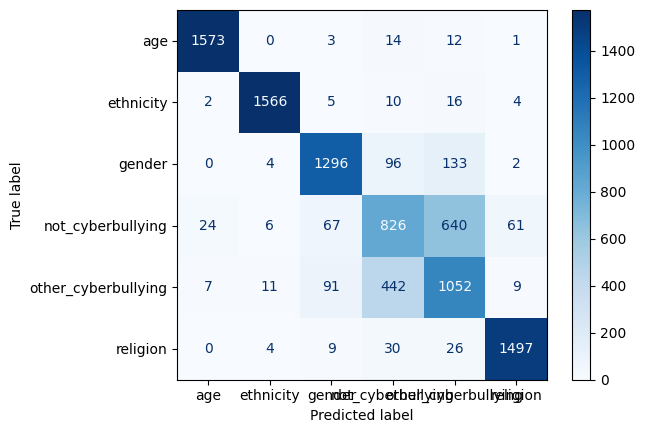

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=label_encoder.classes_, cmap='Blues')
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Setup the grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Run grid search on a smaller subset if needed for speed
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
